# Univariate Linear Regression

## Sacpy.LinReg

Fit the below equation:

$$
    y = ax+b
$$

### parameter: 

* x: x.shape = (time,)
* y: y.shape = (time,n1,n2,...)
    
### attribute:

* slope: a, shape = (n1,n2,...)
* intcpt: b, shape = (n1,n2,...)
* corr: correlation, shape = (n1,n2,...)
* p_value: t-test p_value shape = (n1,n2,...)

### method:

* mask (threshold=0.05): mask unsiginifcant values (p_value>threshold). Get
    self.slope1, self.intcpt1, self.corr1

## Example

### Load Module

In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
import sacpy as scp

### Get SST Data and calculate SST anomaly
### Get Nino3.4 Index

In [13]:
# load sst data
sst = scp.load_sst()['sst']
# get sst anomaly (ssta)
ssta = scp.get_anom(sst,method=0)
Nino34 = ssta.loc[:,-5:5,190:240].mean(("lon","lat"))
LinReg = scp.LinReg(Nino34,ssta)

### Plot

plot the slope and significance test

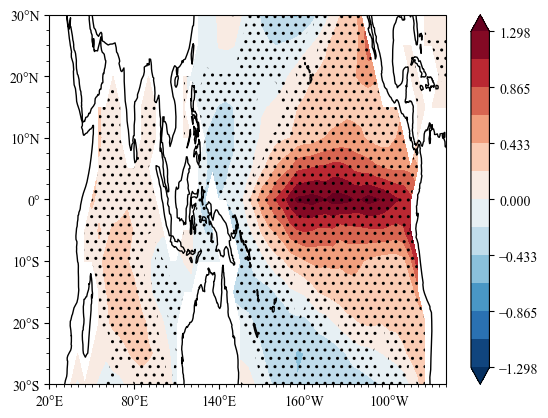

In [15]:
import sacpy.Map
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
# plot slope
LinReg.slope.splot(ax=ax,kw2={"stepx":60})
# significance test(p>0.95)
ax.sig_plot(ssta.lon,ssta.lat,LinReg.p_value,thrshd=0.05)